# Data Loading and Initial Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_excel('data.xlsx')
data.head(3)

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,...,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,main_category,staff_pick.1,show_feature_image,video
0,22292,Golgotha - A Feature Film,5500,5530.0,successful,False,US,USD,2017-07-09 04:59:00,2017-07-09 04:59:01,...,2011,23,6,3,2017,16,Film & Video,False,False,True
1,82234,Vinca is opening a storefront!,10000,11045.0,successful,False,US,USD,2018-10-25 14:29:30,2018-10-25 14:29:32,...,2012,21,9,25,2018,14,Fashion,False,False,True
2,86478,The next Paul Jacobsen & The Madison Arm album!,8500,10556.0,successful,False,US,USD,2019-05-05 16:37:46,2019-05-05 16:37:46,...,2012,22,4,5,2019,16,Music,False,False,True


# Part 1: Classification - Predicting Project Success

Predict whether a Kickstarter project will be “successful” or “failed” using data available at the time of project launch.

## Data Preprocessing
- **Removed post-launch features** (e.g., `state_changed_at`, `backers_count`) to ensure the model only uses pre-launch data.
- **Normalized monetary values** (e.g., `goal`) using `static_usd_rate`.
- **Encoded categorical variables** like `category` and `country` into numerical dummy variables.
- **Handled missing values** and removed duplicates to ensure clean data.

### Inital Data Exploration

In [2]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15215 non-null  int64         
 1   name                      15215 non-null  object        
 2   goal                      15215 non-null  int64         
 3   pledged                   15215 non-null  float64       
 4   state                     15215 non-null  object        
 5   disable_communication     15215 non-null  bool          
 6   country                   15215 non-null  object        
 7   currency                  15215 non-null  object        
 8   deadline                  15215 non-null  datetime64[ns]
 9   state_changed_at          15215 non-null  datetime64[ns]
 10  created_at                15215 non-null  datetime64[ns]
 11  launched_at               15215 non-null  datetime64[ns]
 12  staff_pick        

,id,goal,pledged,deadline,state_changed_at,created_at,launched_at,backers_count,static_usd_rate,usd_pledged,...,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr
count,1.521500e+04,1.521500e+04,1.521500e+04,15215,15215,15215,15215,15215.000000,15215.000000,1.521500e+04,...,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000
mean,3.747672e+06,7.424596e+04,6.044214e+04,2020-01-30 21:33:30.820966144,2020-01-29 20:15:33.106211072,2019-10-21 22:11:14.526717184,2019-12-27 21:17:29.529477632,110.319947,0.968808,1.173648e+04,...,2019.574170,12.748801,6.327769,15.543937,2019.320868,13.174762,6.273349,15.188630,2019.509760,13.472626
min,2.229200e+04,1.000000e+00,0.000000e+00,2017-01-05 17:13:20,2017-01-05 17:13:23,2011-02-01 23:25:17,2017-01-01 13:04:35,0.000000,0.006722,0.000000e+00,...,2017.000000,0.000000,1.000000,1.000000,2011.000000,0.000000,1.000000,1.000000,2017.000000,0.000000
25%,3.309262e+06,1.500000e+03,1.510000e+02,2018-05-03 22:14:32.500000,2018-05-03 00:02:31,2018-02-13 18:06:37,2018-03-31 17:19:22.500000,4.000000,1.000000,1.344862e+02,...,2018.000000,6.000000,3.000000,8.000000,2018.000000,8.000000,3.000000,7.000000,2018.000000,9.000000
50%,3.825787e+06,5.000000e+03,1.684000e+03,2019-12-27 04:45:20,2019-12-24 23:27:00,2019-10-03 18:33:30,2019-11-21 21:03:58,24.000000,1.000000,1.521000e+03,...,2019.000000,14.000000,6.000000,15.000000,2019.000000,15.000000,6.000000,15.000000,2019.000000,15.000000
75%,4.239866e+06,1.600000e+04,8.008500e+03,2021-10-09 07:13:24.500000,2021-10-08 14:01:11.500000,2021-06-27 10:53:46,2021-09-03 20:16:00,84.000000,1.000000,6.930000e+03,...,2021.000000,18.000000,9.000000,23.000000,2021.000000,19.000000,9.000000,23.000000,2021.000000,18.000000
max,4.533733e+06,1.000000e+08,3.793284e+08,2024-08-03 03:03:52,2024-06-19 14:00:45,2022-12-31 19:53:25,2024-06-19 14:00:43,30382.000000,1.433585,7.850867e+06,...,2024.000000,23.000000,12.000000,31.000000,2022.000000,23.000000,12.000000,31.000000,2024.000000,23.000000
std,5.664637e+05,1.664246e+06,3.125586e+06,NaN,NaN,NaN,NaN,532.232328,0.275492,9.984074e+04,...,1.906725,6.903416,3.450322,8.788431,1.888497,6.944570,3.402361,8.949711,1.892405,6.406410


### Feature Engineering



#### Target Variable Adjustment
There are 4 states, but the focus is solely on “successful” and “failed”.

In [3]:
unique_states = data['state'].unique()
print("Unique values in 'state' column:", unique_states)

# Drop rows where 'state' is 'live' or 'canceled'
data = data[~data['state'].isin(['live', 'canceled'])]

Unique values in 'state' column: ['successful' 'failed' 'live' 'canceled']


#### Currency Normalization
Normalize the 'Goal' column to USD using currency exchange rates.

In [4]:
data['normalized_goal'] = data['goal'] * data['static_usd_rate']
data.drop(columns=['goal'], inplace=True)
data.rename(columns={'normalized_goal': 'goal'}, inplace=True)

<ipython-input-4-93483e46be2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalized_goal'] = data['goal'] * data['static_usd_rate']
<ipython-input-4-93483e46be2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['goal'], inplace=True)
<ipython-input-4-93483e46be2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'normalized_go

#### Create Time-Based Features
- Calculate `time_to_launch` (`launched_at` - `created_at`).
- Calculate `campaign_duration` (`deadline` - `launched_at`).
- Drop raw datetime columns after feature creation.

In [5]:
# Convert datetime columns to datetime objects
data['created_at'] = pd.to_datetime(data['created_at'])
data['launched_at'] = pd.to_datetime(data['launched_at'])
data['deadline'] = pd.to_datetime(data['deadline'])

# Calculate time_to_launch and campaign_duration in days
data['time_to_launch'] = (data['launched_at'] - data['created_at']).dt.days
data['campaign_duration'] = (data['deadline'] - data['launched_at']).dt.days

# Remove 'deadline', 'launched_at', 'created_at' from data_clean2 after calculating time_to_launch and campaign_duration
data = data.drop(columns=['deadline', 'launched_at', 'created_at'])
data.describe()

<ipython-input-5-47d6357d396a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created_at'] = pd.to_datetime(data['created_at'])
<ipython-input-5-47d6357d396a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['launched_at'] = pd.to_datetime(data['launched_at'])
<ipython-input-5-47d6357d396a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,id,pledged,state_changed_at,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,goal,time_to_launch,campaign_duration
count,1.446300e+04,1.446300e+04,14463,14463.000000,14463.000000,1.446300e+04,14463.000000,14463.000000,14463.000000,14463.000000,...,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.00000,14463.000000,1.446300e+04,14463.000000,14463.000000
mean,3.750497e+06,6.311020e+04,2020-02-02 11:25:46.494434048,113.078269,0.970111,1.195827e+04,5.375786,5.004356,16.312176,14.975731,...,15.532877,2019.331259,13.173546,6.272419,15.175413,2019.51732,13.464496,4.523772e+04,65.313766,33.661066
min,2.229200e+04,0.000000e+00,2017-01-05 17:13:23,0.000000,0.006722,0.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,2011.000000,0.000000,1.000000,1.000000,2017.00000,0.000000,7.603898e-01,0.000000,1.000000
25%,3.311272e+06,1.880000e+02,2018-05-06 03:59:00,5.000000,1.000000,1.660000e+02,3.000000,3.000000,12.000000,11.000000,...,8.000000,2018.000000,8.000000,3.000000,7.000000,2018.00000,9.000000,1.301362e+03,4.000000,29.000000
50%,3.829774e+06,1.867000e+03,2020-01-01 23:37:01,27.000000,1.000000,1.681000e+03,5.000000,5.000000,17.000000,16.000000,...,15.000000,2019.000000,15.000000,6.000000,15.000000,2019.00000,15.000000,5.000000e+03,13.000000,30.000000
75%,4.243566e+06,8.482000e+03,2021-10-14 01:01:10,88.000000,1.000000,7.300641e+03,7.000000,7.000000,21.000000,19.000000,...,23.000000,2021.000000,19.000000,9.000000,23.000000,2021.00000,18.000000,1.279244e+04,44.000000,37.000000
max,4.533733e+06,3.793284e+08,2024-06-15 20:00:00,30382.000000,1.433585,7.850867e+06,16.000000,14.000000,31.000000,28.000000,...,31.000000,2022.000000,23.000000,12.000000,31.000000,2024.00000,23.000000,1.182690e+08,3899.000000,120.000000
std,5.668509e+05,3.205718e+06,NaN,516.982796,0.274833,1.002657e+05,2.459302,2.280234,5.866888,5.456764,...,8.791560,1.890663,6.945311,3.406237,8.959149,1.88864,6.400281,1.435961e+06,205.060514,12.971604


### Initial Feature Reduction

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 15214
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        14463 non-null  int64         
 1   name                      14463 non-null  object        
 2   pledged                   14463 non-null  float64       
 3   state                     14463 non-null  object        
 4   disable_communication     14463 non-null  bool          
 5   country                   14463 non-null  object        
 6   currency                  14463 non-null  object        
 7   state_changed_at          14463 non-null  datetime64[ns]
 8   staff_pick                14463 non-null  bool          
 9   backers_count             14463 non-null  int64         
 10  static_usd_rate           14463 non-null  float64       
 11  usd_pledged               14463 non-null  float64       
 12  category               

#### Drop Post-launch Features

In [8]:
# Define pre-launch columns (attributes available at launch time)
pre_launch_col = [
    "state","id", "name", "goal", "disable_communication", "country", "currency",
    "deadline", "static_usd_rate", "category", "name_len",
    "name_len_clean", "blurb_len", "blurb_len_clean", "deadline_weekday",
    "created_at", "launched_at", "created_at_weekday", "launched_at_weekday",
    "deadline_month", "deadline_day", "deadline_yr", "deadline_hr",
    "created_at_month", "created_at_day", "created_at_yr", "created_at_hr",
    "launched_at_month", "launched_at_day", "launched_at_yr", "launched_at_hr",
    "main_category", "show_feature_image", "video"
]

# Define post-launch columns (attributes generated after project launch)
post_launch_col = [
    "pledged", "state_changed_at", "backers_count", "usd_pledged",
    "spotlight", "state_changed_at_weekday", "state_changed_at_month",
    "state_changed_at_day", "state_changed_at_yr", "state_changed_at_hr","staff_pick","staff_pick.1"
]
# drop post_launch_col i defined earlier from data
columns_to_drop = [col for col in post_launch_col if col in data.columns]
data = data.drop(columns=post_launch_col)

#### Remove Irrelavant Features

In [9]:
drop_cols = []
# Drop identifiers
drop_cols.extend(["id", "name"])

drop_cols.extend([
    'deadline_weekday',
    'created_at_weekday',
    'launched_at_weekday',
    'deadline_month',
    'deadline_day',
    'deadline_yr',
    'deadline_hr',
    'created_at_month',
    'created_at_day',
    'created_at_yr',
    'created_at_hr',
    'launched_at_month',
    'launched_at_day',
    'launched_at_yr',
    'launched_at_hr'
])


# drop "disable_communication" the same reason as before
drop_cols.append("disable_communication")

# I normalize the currency, so I dont need "static_usd_rate" anymore
drop_cols.extend(["static_usd_rate","currency"])

# replicated features, so i will drop these two and keep the cleaned version
drop_cols.extend(["blurb_len", "name_len"])

print(len(drop_cols))
data = data.drop(columns=drop_cols)
data.info()

22
<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 15214
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               14463 non-null  object 
 1   country             14463 non-null  object 
 2   category            14463 non-null  object 
 3   name_len_clean      14463 non-null  int64  
 4   blurb_len_clean     14463 non-null  int64  
 5   main_category       14185 non-null  object 
 6   show_feature_image  14463 non-null  bool   
 7   video               14463 non-null  bool   
 8   goal                14463 non-null  float64
 9   time_to_launch      14463 non-null  int64  
 10  campaign_duration   14463 non-null  int64  
dtypes: bool(2), float64(1), int64(4), object(4)
memory usage: 1.1+ MB


### Missing Value & Duplications

After reviewing the project websites with missing values, I discovered that the categories are actually listed on their websites. Therefore, instead of imputing the missing values, I decided to remove those records.

In [10]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

data_clean = data.dropna()

Missing values in each column:
 state                   0
country                 0
category                0
name_len_clean          0
blurb_len_clean         0
main_category         278
show_feature_image      0
video                   0
goal                    0
time_to_launch          0
campaign_duration       0
dtype: int64


In [11]:
duplicates = data_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Skewness & Normalization

In [12]:
numerical_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns
skewness = data_clean[numerical_columns].skew()
print("Skewness Before transformation:\n")
print(skewness)

for col in numerical_columns:
    skew_value = skewness[col]

    if skew_value > 1:
        data_clean[col] = np.log1p(data_clean[col])  # log(1 + x) to handle zeros
    elif skew_value < -1:
        data_clean[col] = np.square(data_clean[col])  # Square transformation to reduce negative skew

# Check skewness again to confirm
new_skewness = data_clean[numerical_columns].skew()
print("\n")
print("Skewness after transformation:\n")
print(new_skewness)

Skewness Before transformation:

name_len_clean        0.219457
blurb_len_clean      -0.428148
goal                 66.867721
time_to_launch        8.451999
campaign_duration     0.762189
dtype: float64


Skewness after transformation:

name_len_clean       0.219457
blurb_len_clean     -0.428148
goal                -0.117741
time_to_launch       0.255996
campaign_duration    0.762189
dtype: float64


<ipython-input-12-bd1f34ee65dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = np.log1p(data_clean[col])  # log(1 + x) to handle zeros


In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14185 entries, 0 to 15214
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               14185 non-null  object 
 1   country             14185 non-null  object 
 2   category            14185 non-null  object 
 3   name_len_clean      14185 non-null  int64  
 4   blurb_len_clean     14185 non-null  int64  
 5   main_category       14185 non-null  object 
 6   show_feature_image  14185 non-null  bool   
 7   video               14185 non-null  bool   
 8   goal                14185 non-null  float64
 9   time_to_launch      14185 non-null  float64
 10  campaign_duration   14185 non-null  int64  
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 1.1+ MB


### Dummification

In [14]:
# Separate target variable 'state' and predictors
y = data_clean['state']
target_mapping = {
    'successful': 1,
    'failed': 0,
}
y = y.map(target_mapping)
X = data_clean.drop(columns=['state'])


# Identify categorical columns
categorical_col = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Display results
print("Target variable (y):", y.name)
print("Categorical columns:", categorical_col)

# Dummify Categorical Variables and reconstruct X
X = pd.get_dummies(X, columns=categorical_col, drop_first=True)
X.info()


Target variable (y): state
Categorical columns: ['country', 'category', 'main_category', 'show_feature_image', 'video']
<class 'pandas.core.frame.DataFrame'>
Index: 14185 entries, 0 to 15214
Columns: 270 entries, name_len_clean to video_True
dtypes: bool(265), float64(2), int64(3)
memory usage: 4.2 MB


### Outliers - Isolation Forest

In [15]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, contamination='auto', random_state=0)
model.fit(X)

anomaly_scores = model.decision_function(X)

sorted_scores_indices = np.argsort(anomaly_scores)[::-1]
sorted_scores = anomaly_scores[sorted_scores_indices]

# Filter for scores greater than 0.5
filtered_indices = sorted_scores_indices[sorted_scores > 0.5]
filtered_scores = sorted_scores[sorted_scores > 0.5]

print("Indices of samples with scores greater than 0.5:", filtered_indices)
print("Anomaly scores for those samples:", filtered_scores)

# check why there is no outliers
min_score = anomaly_scores.min()
max_score = anomaly_scores.max()

print("Minimum anomaly score:", min_score)
print("Maximum anomaly score:", max_score)

Indices of samples with scores greater than 0.5: []
Anomaly scores for those samples: []
Minimum anomaly score: 0.1276409406814309
Maximum anomaly score: 0.19604826975597184


Since the max anomaly score is 0.19, way smaller than 0.5, so there is no outliers detected by this method.

### Multicollinearity

After analyzing the VIF scores and the correlation heatmap for all numerical features, no adjustments to the data were necessary.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.float_format = '{:.2f}'.format
numerical_col_df = X[[c for c in X.columns if c in numerical_columns]]

vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_col_df.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_col_df.values, i) for i in range(len(numerical_col_df.columns))]
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)
pd.reset_option('display.float_format')

             Feature   VIF
0               goal 15.46
1    blurb_len_clean  7.96
2  campaign_duration  7.63
3     name_len_clean  5.57
4     time_to_launch  3.66


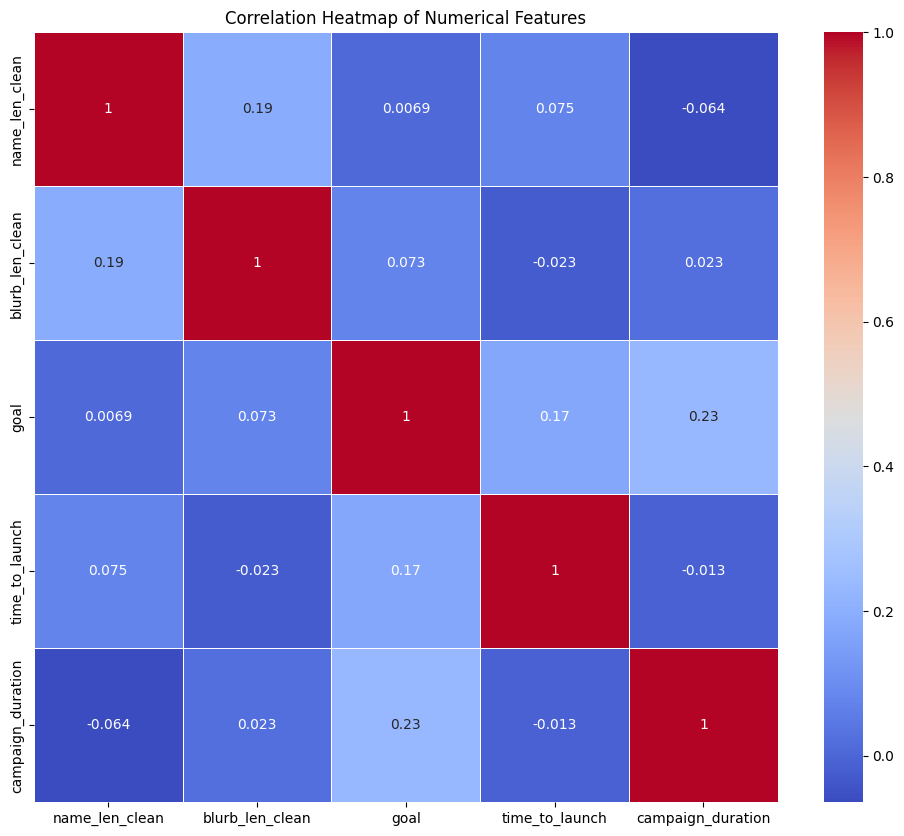

In [17]:
correlation_matrix = X[numerical_columns].corr()  # Calculate correlation on the DataFrame subset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


At this point, I have the following:

1. **`data_clean`**: Preprocessed clean dataset without dummifying all categorical variables.  
2. **`X`**: All predictors after dummification.  
3. **`y`**: Preprocessed clean target variable.  
4. **`scaled_X_train`**: Scaled training set of predictors (`X`).  
5. **`scaled_X_test`**: Scaled test set of predictors (`X`).  

## Feature Selection

### LASSO for feature selection

In [19]:
from sklearn.linear_model import Lasso

# Assuming scaled_X_train and y_train are already defined
ls = Lasso(alpha=0.01)
model = ls.fit(scaled_X_train, y_train)

# Create a DataFrame of coefficients
coef_df = pd.DataFrame(list(zip(X_train.columns, model.coef_)), columns=['predictor', 'coefficient'])

# Rank by absolute value of coefficients in descending order
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False).drop(columns=['abs_coefficient']).reset_index(drop=True)

# Filter to show only features with a non-zero coefficient (or a set threshold, if desired)
threshold = 0.01  # Adjust this value as needed to control the number of features displayed
coef_df = coef_df[coef_df['coefficient'].abs() > threshold].reset_index(drop=True)

# Display the filtered and ranked DataFrame
print(coef_df)

lasso_selected_features = coef_df['predictor'].tolist()
print(lasso_selected_features)


                    predictor  coefficient
0                        goal    -0.120908
1                  video_True     0.063195
2            category_Apparel     0.056861
3              time_to_launch     0.055436
4        category_Documentary     0.054869
5             category_Shorts     0.054672
6        category_Accessories     0.052143
7           campaign_duration    -0.050288
8   category_Children's Books     0.049776
9      category_Playing Cards     0.046600
10    category_Country & Folk     0.044950
11         category_Art Books     0.042088
12    show_feature_image_True     0.041445
13              category_Rock     0.041138
14        category_Nonfiction     0.038597
15       category_Anthologies     0.034323
16       category_Video Games     0.031677
17               category_Web    -0.028596
18      category_Illustration     0.028396
19    category_Narrative Film     0.026462
20        category_Photobooks     0.023641
21                 country_IT    -0.023042
22        c

### Random Forest for Feature Selection

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

threshold = 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]
print(important_features)

selected_features_rf = important_features['Feature'].tolist()

# Print the list of selected features
print(selected_features_rf)

                     Feature  Importance
0                       goal    0.153823
1             time_to_launch    0.106618
2          campaign_duration    0.092331
3            blurb_len_clean    0.077261
4             name_len_clean    0.060263
5                 video_True    0.027056
6         main_category_Food    0.015398
7                 country_US    0.014537
8    show_feature_image_True    0.014343
9       category_Accessories    0.011772
10          category_Apparel    0.011338
11      category_Documentary    0.011052
12           category_Shorts    0.010859
13              category_Web    0.010458
14  main_category_Technology    0.010231
['goal', 'time_to_launch', 'campaign_duration', 'blurb_len_clean', 'name_len_clean', 'video_True', 'main_category_Food', 'country_US', 'show_feature_image_True', 'category_Accessories', 'category_Apparel', 'category_Documentary', 'category_Shorts', 'category_Web', 'main_category_Technology']


In [21]:
feature_sets = {
    "random_forest_selected":selected_features_rf,
    "lasso_selected": lasso_selected_features,
    "primary_features": [
        'goal',
        'time_to_launch',
        'campaign_duration',
        'blurb_len_clean',
        'name_len_clean',
        'video_True',
        'category_Accessories'],
    "all features": X.columns.tolist()
}

## Modelling & Performance


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

results = []

# Loop through models and feature sets
for model_name, model in [
    ("Logistic Regression", LogisticRegression(max_iter=2000)),
    ("Random Forest", RandomForestClassifier(random_state=0)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=150,learning_rate=0.1, max_depth=3)),
    ("KNN", KNeighborsClassifier(n_neighbors=5))
]:
    for feature_set_name, feature_set in feature_sets.items():
        # Select features for the current feature set
        X_train_selected = X_train[feature_set]

        # Perform cross-validation and calculate the mean accuracy
        cv_scores = cross_val_score(model, X_train_selected, y_train, cv=3, scoring='accuracy')
        mean_accuracy = cv_scores.mean()

        # Store the results
        results.append([model_name, feature_set_name, mean_accuracy])

# Sort results by accuracy in descending order
results_sorted = sorted(results, key=lambda x: x[2], reverse=True)

# Print the sorted results in a table format
print("{:<25} {:<25} {:<10}".format("Model", "Feature Set", "Accuracy"))
print("-" * 60)
for model_name, feature_set_name, accuracy in results_sorted:
    print("{:<25} {:<25} {:<10.4f}".format(model_name, feature_set_name, accuracy))

Model                     Feature Set               Accuracy  
------------------------------------------------------------
Logistic Regression       all features              0.7844    
Gradient Boosting         all features              0.7824    
Logistic Regression       lasso_selected            0.7800    
Gradient Boosting         lasso_selected            0.7796    
Random Forest             all features              0.7765    
Random Forest             lasso_selected            0.7589    
Gradient Boosting         random_forest_selected    0.7503    
Logistic Regression       random_forest_selected    0.7439    
Random Forest             random_forest_selected    0.7315    
Gradient Boosting         primary_features          0.7177    
Logistic Regression       primary_features          0.7160    
Random Forest             primary_features          0.7009    
KNN                       all features              0.6755    
KNN                       random_forest_selected    0.674

In [23]:
final_selected_features = feature_sets["all features"]
X_train_selected = X_train[final_selected_features]
final_model = LogisticRegression(max_iter=2000)
final_model.fit(X_train_selected, y_train)

X_test_selected = X_test[final_selected_features]
y_pred = final_model.predict(X_test_selected)

#Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression with all features on the test set: {accuracy}")

Accuracy of Logistic Regression with all features on the test set: 0.7865501198364585


In [24]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7092 entries, 2835 to 2957
Columns: 270 entries, name_len_clean to video_True
dtypes: bool(265), float64(2), int64(3)
memory usage: 2.1 MB


# Part 2: Clustering

I want to explore only on successful projects, explore the charestistic of category of projects.

In [26]:
data_clustering = pd.read_excel('Kickstarter.xlsx')
data_clustering.dropna()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,...,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,main_category,staff_pick.1,show_feature_image,video
0,22292,Golgotha - A Feature Film,5500,5530.0,successful,False,US,USD,2017-07-09 04:59:00,2017-07-09 04:59:01,...,2011,23,6,3,2017,16,Film & Video,False,False,True
1,82234,Vinca is opening a storefront!,10000,11045.0,successful,False,US,USD,2018-10-25 14:29:30,2018-10-25 14:29:32,...,2012,21,9,25,2018,14,Fashion,False,False,True
2,86478,The next Paul Jacobsen & The Madison Arm album!,8500,10556.0,successful,False,US,USD,2019-05-05 16:37:46,2019-05-05 16:37:46,...,2012,22,4,5,2019,16,Music,False,False,True
3,127446,Erin Heist First Full-Length Album,5000,5816.0,successful,False,US,USD,2021-11-25 21:00:14,2021-11-25 21:00:14,...,2012,22,10,26,2021,20,Music,False,False,True
4,151612,Earth Day Heritage: A Celebration in Music and...,15000,2361.0,failed,False,US,USD,2021-04-15 21:22:00,2021-04-15 21:22:00,...,2012,21,3,15,2021,19,Music,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15210,4533276,AN SCP LIVE ACTION MINI SERIES,2000,2002.0,successful,False,GB,GBP,2023-10-18 17:41:20,2023-10-18 17:41:20,...,2022,16,9,18,2023,17,Film & Video,False,False,True
15211,4533396,Seaworthy Seductions - Art Exhibit + Community...,5000,5791.0,successful,False,US,USD,2023-04-01 03:11:00,2023-04-01 03:11:00,...,2022,21,3,6,2023,23,Art,False,False,True
15212,4533462,The Second Coming,500,526.0,successful,False,US,USD,2023-04-20 07:15:27,2023-04-20 07:15:27,...,2022,1,3,31,2023,7,Music,False,False,True
15213,4533499,Eugene Art House presents: The Films of Federi...,5975,6537.0,successful,False,US,USD,2023-01-25 07:59:00,2023-01-25 07:59:00,...,2022,3,1,1,2023,22,Film & Video,False,False,True


## Feature Engineering

### Currency Normalization

In [27]:
data_clustering['normalized_goal'] = data_clustering['goal'] * data_clustering['static_usd_rate']
data_clustering.drop(columns=['goal'], inplace=True)
data_clustering.rename(columns={'normalized_goal': 'goal'}, inplace=True)

### Create Time-Based Features
- Calculate `time_to_launch` (`launched_at` - `created_at`).
- Calculate `campaign_duration` (`deadline` - `launched_at`).
- Drop raw datetime columns after feature creation.

In [28]:
# Convert datetime columns to datetime objects
data_clustering['created_at'] = pd.to_datetime(data_clustering['created_at'])
data_clustering['launched_at'] = pd.to_datetime(data_clustering['launched_at'])
data_clustering['deadline'] = pd.to_datetime(data_clustering['deadline'])

# Calculate time_to_launch and campaign_duration in days
data_clustering['time_to_launch'] = (data_clustering['launched_at'] - data_clustering['created_at']).dt.days
data_clustering['campaign_duration'] = (data_clustering['deadline'] - data_clustering['launched_at']).dt.days

data_clustering = data_clustering.drop(columns=['deadline', 'launched_at', 'created_at'])

In [29]:
clustering_select_list = []

# Project Information:
clustering_select_list.extend([
    'main_category',           # Product category (target variable)
    'blurb_len_clean',  # Length of the project description (cleaned)
    'name_len_clean',   # Length of the project name (cleaned)
    'show_feature_image', # Whether the project has a feature image (True/False)
    'video',            # Whether the project has a video (True/False)
    'state'
])

# Funding & Financial Metrics:
clustering_select_list.extend([
    'goal',           # Funding goal of the project
    'usd_pledged'   # Total amount pledged in USD
])

# Project Timeline:
clustering_select_list.extend([
    'time_to_launch',   # Time between project creation and launch (days)
    'campaign_duration'  # Duration of the campaign (days)
])

data_clustering = data_clustering[clustering_select_list]
data_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   main_category       14937 non-null  object 
 1   blurb_len_clean     15215 non-null  int64  
 2   name_len_clean      15215 non-null  int64  
 3   show_feature_image  15215 non-null  bool   
 4   video               15215 non-null  bool   
 5   state               15215 non-null  object 
 6   goal                15215 non-null  float64
 7   usd_pledged         15215 non-null  float64
 8   time_to_launch      15215 non-null  int64  
 9   campaign_duration   15215 non-null  int64  
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 980.8+ KB


### Filter for Successful Projects with `goal`

In [30]:
# Select only successful projects
data_clustering = data_clustering[data_clustering['state'] == 'successful']
data_clustering.drop(columns=['state'], inplace=True)

# Remove projects without a goal
data_clustering = data_clustering.dropna(subset=['goal'])

## Data Transformation

In [31]:
# Dummify categorical variables and reassign to data_clustering
categorical_cols_clustering = ['main_category', 'show_feature_image', 'video']
data_clustering = pd.get_dummies(data_clustering, columns=categorical_cols_clustering, drop_first=True)
data_clustering.info()
data_clustering_final = data_clustering.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 8351 entries, 0 to 15213
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blurb_len_clean             8351 non-null   int64  
 1   name_len_clean              8351 non-null   int64  
 2   goal                        8351 non-null   float64
 3   usd_pledged                 8351 non-null   float64
 4   time_to_launch              8351 non-null   int64  
 5   campaign_duration           8351 non-null   int64  
 6   main_category_Comics        8351 non-null   bool   
 7   main_category_Crafts        8351 non-null   bool   
 8   main_category_Dance         8351 non-null   bool   
 9   main_category_Design        8351 non-null   bool   
 10  main_category_Fashion       8351 non-null   bool   
 11  main_category_Film & Video  8351 non-null   bool   
 12  main_category_Food          8351 non-null   bool   
 13  main_category_Games         8351 non-

In [32]:
# Log transform 'goal', 'backers_count', 'usd_pledged' cuz of high skewness
for col in ['goal', 'usd_pledged']:
  data_clustering[col] = np.log1p(data_clustering[col])

In [33]:
# Select the columns i want to standardize
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['blurb_len_clean', 'name_len_clean', 'time_to_launch', 'campaign_duration','goal', 'usd_pledged']
scaler = StandardScaler()
data_clustering[columns_to_standardize] = scaler.fit_transform(data_clustering[columns_to_standardize])

## PCA

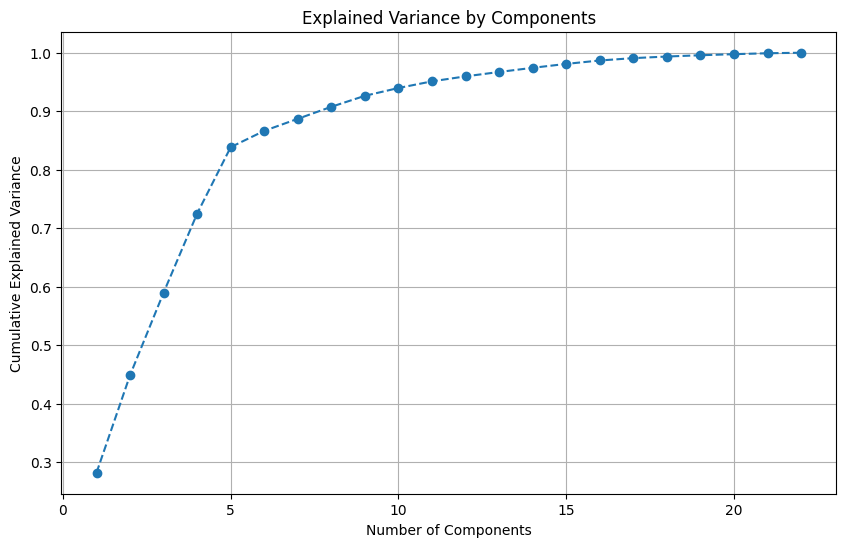

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_clustering)

# ### Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [35]:
pca = PCA(n_components=2,random_state=5)
reduced_data = pca.fit_transform(data_clustering)

## Building K mean clustering model

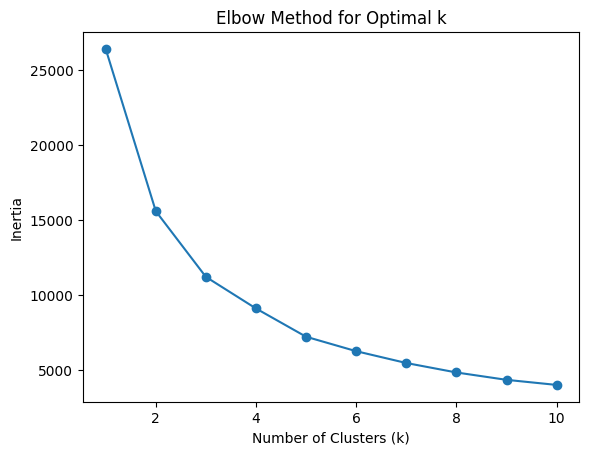

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal number of clusters
inertias = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=5)
  kmeans.fit(reduced_data)
  inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, random_state=5)
kmeans.fit(reduced_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

## Model Evaluation

In [38]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print(f"Silhouette score for PCA with {2} components: {silhouette_avg}")

Silhouette score for PCA with 2 components: 0.34621170263012324


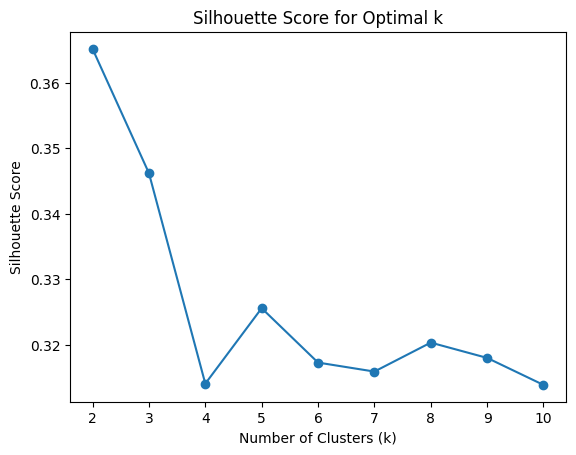

Silhouette score for PCA with 2 components and optimal k: 0.36517698598541976


In [39]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = kmeans.fit_predict(reduced_data)
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the n_clusters that maximizes the silhouette score
optimal_n_clusters = np.argmax(silhouette_scores) + 2

# Re-train KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=5)
kmeans.fit(reduced_data)

# Get updated cluster labels
cluster_labels = kmeans.labels_

# Evaluate the model again with the optimal number of clusters
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print(f"Silhouette score for PCA with {2} components and optimal k: {silhouette_avg}")

### Fine tune hyperparameters

In [40]:
# Iterate through different numbers of components for PCA
n_components_values = [2,5,10,15,20]
for n_components in n_components_values:  # Try components from 2 to 10
  pca = PCA(n_components=n_components, random_state=5)
  reduced_data = pca.fit_transform(data_clustering)

  # Apply KMeans clustering
  kmeans = KMeans(n_clusters=3, random_state=5)
  kmeans.fit(reduced_data)
  cluster_labels = kmeans.labels_

  # Calculate silhouette score
  silhouette_avg = silhouette_score(reduced_data, cluster_labels)
  print(f"Silhouette score for PCA with {n_components} components: {silhouette_avg}")

Silhouette score for PCA with 2 components: 0.34621170263012324
Silhouette score for PCA with 5 components: 0.18991739364101554
Silhouette score for PCA with 10 components: 0.20241516737181722
Silhouette score for PCA with 15 components: 0.14966435376364193
Silhouette score for PCA with 20 components: 0.18389390308826728


In [41]:
data_clustering.head(3)

,blurb_len_clean,name_len_clean,goal,usd_pledged,time_to_launch,campaign_duration,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,show_feature_image_True,video_True
0,1.006745,-0.974066,0.428350,0.059898,10.503253,0.345081,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.571905,-0.526110,0.804837,0.510660,10.911025,-0.096529,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.311963,0.369801,0.702488,0.481153,11.801562,-0.096529,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


## Final Clustering Model

In [42]:
pca_final = PCA(n_components=2, random_state=5)
reduced_data_final = pca_final.fit_transform(data_clustering)

kmeans_final = KMeans(n_clusters=3, random_state=5)
kmeans_final.fit(reduced_data_final)

cluster_labels_final = kmeans_final.labels_

# Calculate the Silhouette score
silhouette_avg_final = silhouette_score(reduced_data_final, cluster_labels_final)
print(f"Final Silhouette score: {silhouette_avg_final}")

data_clustering_final['cluster'] = cluster_labels_final

Final Silhouette score: 0.34621170263012324


## Analysis on Clustering Results

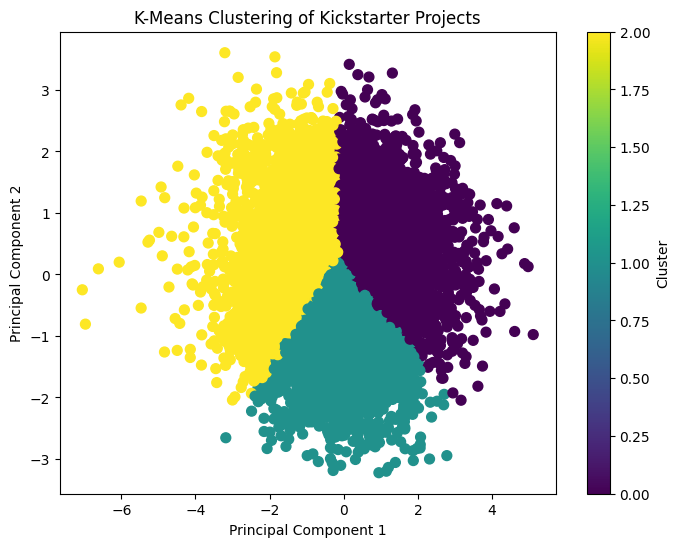

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_final[:, 0], reduced_data_final[:, 1], c=cluster_labels_final, cmap='viridis', s=50)
plt.title('K-Means Clustering of Kickstarter Projects')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Cluster Feature Summary

In [44]:
cluster_summary = data_clustering_final.groupby('cluster').mean().T
print("\nCluster Summary Table (Transposed):")
print(cluster_summary.to_string(index=True))


Cluster Summary Table (Transposed):
cluster                                0             1            2
blurb_len_clean                17.389133     10.834053    15.053094
name_len_clean                  6.372487      3.435073     5.411001
goal                        14645.372548   6132.342081   775.996357
usd_pledged                 42304.489970  10400.358891  1737.243261
time_to_launch                110.117776     61.758337    35.880061
campaign_duration              32.261621     34.648097    26.210084
main_category_Comics            0.017588      0.015692     0.012987
main_category_Crafts            0.020729      0.031385     0.076012
main_category_Dance             0.010992      0.013339     0.009167
main_category_Design            0.025754      0.023146     0.028648
main_category_Fashion           0.096734      0.086308     0.137128
main_category_Film & Video      0.132852      0.199686     0.112681
main_category_Food              0.076947      0.043154     0.029794
main_catego

### `goal` & `usd_pledged`

**Bar Chart - Cluster Profiles (Key Metrics)**:
   - Used to derive `goal` and `pledged` insights for each cluster.

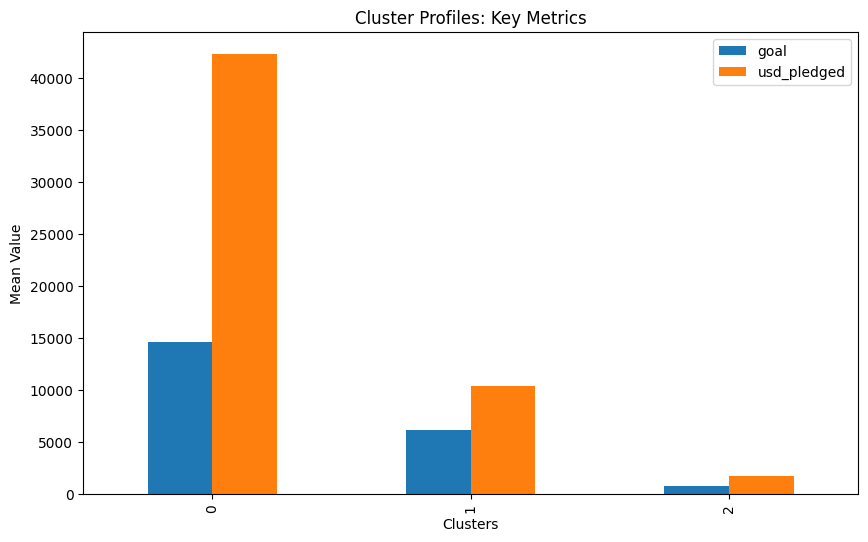

In [45]:
import matplotlib.pyplot as plt

# Features to visualize
features = ['goal', 'usd_pledged']
cluster_means = data_clustering_final.groupby('cluster')[features].mean()

# Bar plot
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles: Key Metrics')
plt.ylabel('Mean Value')
plt.xlabel('Clusters')
plt.show()

### `time_to_launch` & `campaign_duration`

**Grouped Bar Chart - Time to Launch and Campaign Duration**:
   - Showcases `time_to_launch` and `campaign_duration` comparisons.

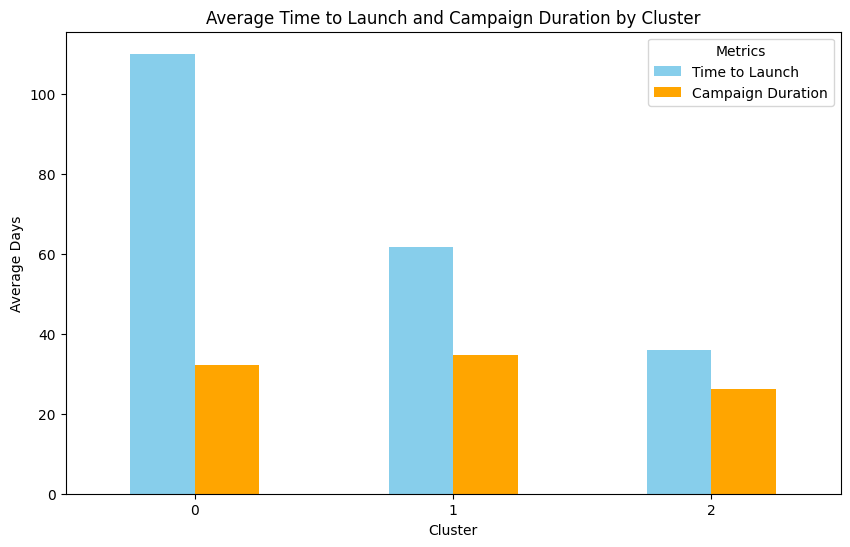

In [46]:
cluster_means = data_clustering_final.groupby('cluster')[['time_to_launch', 'campaign_duration']].mean()

# Plot grouped bar chart
cluster_means.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Add title and labels
plt.title('Average Time to Launch and Campaign Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Days')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Metrics', labels=['Time to Launch', 'Campaign Duration'])
plt.show()

### `video_True`

**Bar Chart - Proportion of Campaigns Using Videos**:
   - Highlights differences in `video_True` proportions.

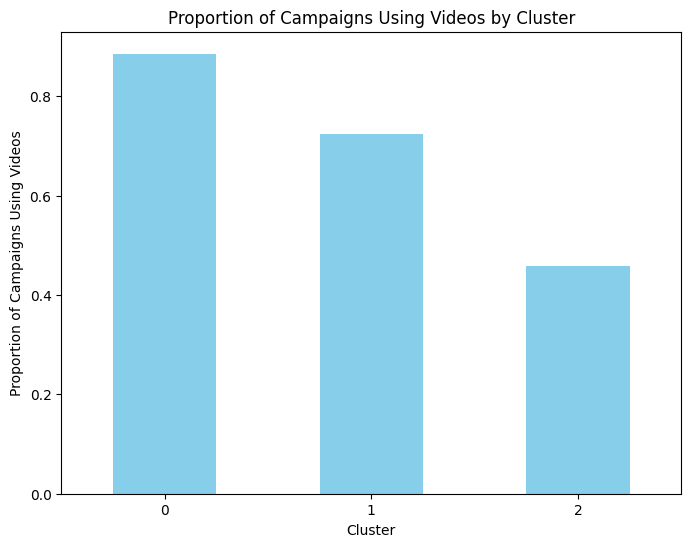

In [47]:
video_usage = data_clustering_final.groupby('cluster')['video_True'].mean()

video_usage.plot(kind='bar', figsize=(8, 6), color='skyblue')

plt.title('Proportion of Campaigns Using Videos by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Campaigns Using Videos')
plt.xticks(rotation=0)
plt.show()

### Category

In [48]:
# Calculate variance across clusters for categorical variables
categorical_vars = [col for col in data_clustering_final.columns if 'main_category_' in col]
categorical_variance = data_clustering_final.groupby('cluster')[categorical_vars].mean().var()

# Sort variables by variance (descending)
distinctive_vars = categorical_variance.sort_values(ascending=False)
print(distinctive_vars)

main_category_Film & Video    0.002074
main_category_Music           0.001158
main_category_Technology      0.001133
main_category_Crafts          0.000860
main_category_Fashion         0.000720
main_category_Food            0.000591
main_category_Games           0.000552
main_category_Publishing      0.000105
main_category_Design          0.000008
main_category_Journalism      0.000006
main_category_Comics          0.000005
main_category_Theater         0.000005
main_category_Dance           0.000004
main_category_Photography     0.000003
dtype: float64


**Heatmap - `main_category_*` Variables**:
   - Visualizes category distribution across clusters, identifying dominant areas for each group.

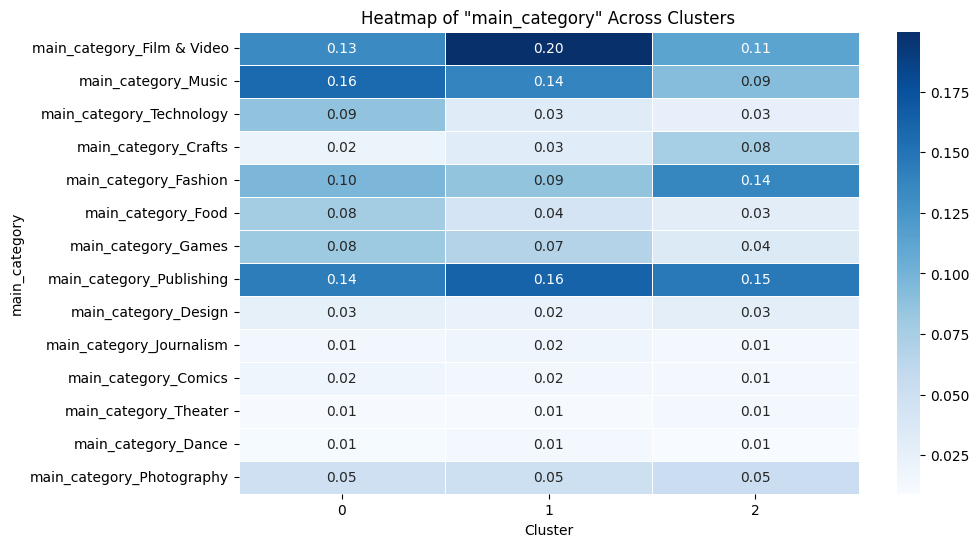

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate variance across clusters for categorical variables
categorical_vars = [col for col in data_clustering_final.columns if 'main_category_' in col]
categorical_variance = data_clustering_final.groupby('cluster')[categorical_vars].mean().var()

# Sort variables by variance (descending)
distinctive_vars = categorical_variance.sort_values(ascending=False)

# Calculate the means of distinctive categorical variables for each cluster
categorical_means = data_clustering_final.groupby('cluster')[distinctive_vars.index].mean() # This line is added

# Heatmap for categorical means
plt.figure(figsize=(10, 6))
sns.heatmap(categorical_means.T, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Heatmap of "main_category" Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('main_category')
plt.show()

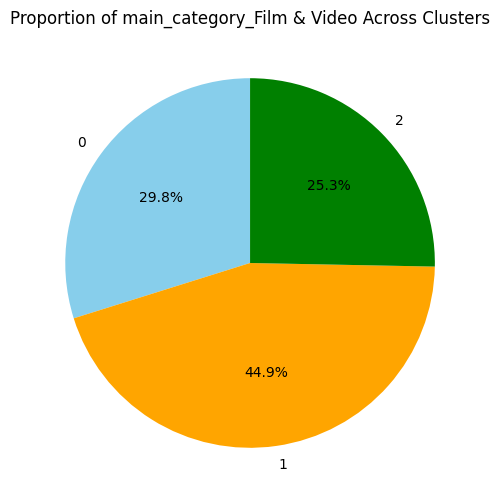

In [50]:
variable_to_plot = 'main_category_Film & Video'

variable_proportions = data_clustering_final.groupby('cluster')[variable_to_plot].mean()

variable_proportions.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), startangle=90, colors=['skyblue', 'orange', 'green'])

plt.title(f'Proportion of {variable_to_plot} Across Clusters')
plt.ylabel('')
plt.show()

## Cluster Analysis

### **Cluster 0: Premium and Ambitious Projects**
#### **Key Characteristics**
- **High average goal**: 14,645  
  *Derived from*: Bar chart comparing `goal` and `usd_pledged` by cluster.  
  
- **Highest pledged amount**: 42,304  
  *Derived from*: The same bar chart, where Cluster 0 significantly outperforms other clusters in `usd_pledged`.

- **Longest time to launch**: 110 days  
  *Derived from*: Grouped bar chart comparing `time_to_launch` and `campaign_duration`.  

- **Significant use of videos**: 89% of campaigns include videos.  
  *Derived from*: Bar chart showing `video_True` proportions by cluster.  

- **Dominant categories**:  
  - **Film & Video**: 13%  
  - **Music**: 16%  
  *Derived from*: Heatmap of `main_category_*` variables across clusters.  

---

### **Cluster 1: Mid-Range Projects**
#### **Key Characteristics**
- **Moderate goals and pledges**: 6,132 in goal and 10,400 pledged.
  *Derived from*: Bar chart comparing `goal` and `usd_pledged` by cluster.  

- **Shorter time to launch**: 61 days.  
  *Derived from*: Grouped bar chart comparing `time_to_launch` and `campaign_duration`.  

- **Good use of videos**: 72% of campaigns include videos.  
  *Derived from*: Bar chart showing `video_True` proportions by cluster.  

- **Diverse categories**:  
  - **Publishing**: 16%  
  - **Film & Video**: 20%  
  - **Technology**: 9%  
  *Derived from*: Heatmap of `main_category_*` variables across clusters.  

---

### **Cluster 2: Small-Scale, Niche Projects**
#### **Key Characteristics**
- **Low goals and pledges**: 775 goal and 1,737 pledged.  
  *Derived from*: Bar chart comparing `goal` and `usd_pledged` by cluster.  

- **Shortest time to launch**: 36 days.  
  *Derived from*: Grouped bar chart comparing `time_to_launch` and `campaign_duration`.  

- **Limited use of videos**: 46% of campaigns include videos.  
  *Derived from*: Bar chart showing `video_True` proportions by cluster.  

- **Dominant categories**:  
  - **Fashion**: 14%  
  - **Crafts**: 8%  
  *Derived from*: Heatmap of `main_category_*` variables across clusters.  

---